In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import arviz as az
#try:
#    np.distutils.__config__.blas_opt_info = np.distutils.__config__.blas_ilp64_opt_info
#except Exception:
#    pass
import matplotlib.pyplot as plt
from statsmodels.formula.api import glm
import statsmodels.api as sm
import seaborn as sns

In [3]:
#df=pd.read_csv("https://gist.githubusercontent.com/lisawilliams/a91ffcea96ac3af9500bbf6b92f1408e/raw/728e9b2e4fb0da2baa34e2da2a9d732d74b484ab/cereal.csv")
#df.to_csv("cereal.csv")
df=pd.read_csv("cereal.csv")

column_name="Cereal Name"
#df[column_name] = df[column_name].astype('category')
#df[column_name] = df[column_name].cat.categories

le = LabelEncoder()
df["Cereal_Name"] = le.fit_transform(df[column_name])

print(df.head())


   Unnamed: 0                Cereal Name    Manufacturer Type  Calories  \
0           0                  100%_Bran         Nabisco    C        70   
1           1          100%_Natural_Bran     Quaker Oats    C       120   
2           2                   All-Bran        Kelloggs    C        70   
3           3  All-Bran_with_Extra_Fiber        Kelloggs    C        50   
4           4             Almond_Delight  Ralston Purina    C       110   

   Protein (g)  Fat  Sodium  Dietary Fiber  Carbs  Sugars  Display Shelf  \
0            4    1     130           10.0    5.0       6              3   
1            3    5      15            2.0    8.0       8              3   
2            4    1     260            9.0    7.0       5              3   
3            4    0     140           14.0    8.0       0              3   
4            2    2     200            1.0   14.0       8              3   

   Potassium  Vitamins and Minerals  Serving Size Weight  Cups per Serving  \
0        280  

C:\Users\dnishimoto\Anaconda3\envs\deeplearning\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1767: RuntimeWarning: invalid value encountered in double_scalars
  prsq = 1 - np.exp((self.llnull - self.llf) * (2 / self.nobs))
C:\Users\dnishimoto\Anaconda3\envs\deeplearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dnishimoto\Anaconda3\envs\deeplearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dnishimoto\Anaconda3\envs\deeplearning\lib\site-pa

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Carbs   No. Observations:                   74
Model:                            GLM   Df Residuals:                       71
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                   -inf
Date:                Wed, 22 Feb 2023   Deviance:                       163.45
Time:                        15:19:02   Pearson chi2:                     73.6
No. Iterations:                     5   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8807      0.056     51.698      0.0

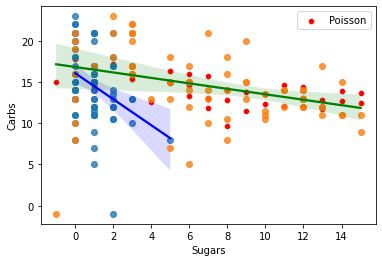

Sugars are a strong indicator of the carbohydrate count


In [52]:
formula="Carbs ~ Fat + Sugars"
df["Carbs"]=df["Carbs"].astype(float)
df["Fat"]=df["Fat"].astype(int)
df["Sugars"]=df["Sugars"].astype(int)


columns=["Carbs","Fat","Sugars"]
#sm.families.Binomial, sm.families.links.logit
model=sm.GLM.from_formula(formula, data=df[columns],family = sm.families.Poisson()).fit()

print(model.summary())
print("Carbs mean",df["Carbs"].mean())
    # create a trace file
trace = model.get_influence().summary_frame()

intercept_mean=model.params["Intercept"]
fat_mean=model.params["Fat"]
sugar_mean=model.params["Sugars"]


df["Fit_Values"]=model.fittedvalues

sns.scatterplot('Sugars','Fit_Values',
    data=df,
    color='red',
    label='Poisson')


sns.regplot('Fat','Carbs',
data=df,
fit_reg=True,
#y_jitter=0.3,
line_kws={'color':'blue',
'label':'LM fit'})

sns.regplot('Sugars','Carbs',
data=df,
fit_reg=True,
#y_jitter=0.3,
line_kws={'color':'green',
'label':'LM fit'})

plt.show()

print("Sugars are a strong indicator of the carbohydrate count")


#varnames=None
#if varnames is None:
#    varnames = ['X_%i' % i for i in range(trace.shape[1])]
#fig, ax = plt.subplots(figsize=(12, len(varnames) * 2.5 + 2.5))

#intercept_mean = np.mean(trace.get_values("Intercept")) 
#fat_mean = np.mean(trace.get_values("Fat")) 
#sugars_mean = np.mean(trace.get_values("Sugars")) 
#cereal_name_mean = np.mean(trace.get_values("Cereal_Name")) 
#sd_mean = np.mean(trace.get_values("sd")) 